Unit 3 - Exercises

In [9]:
# Import libraries
import pandas as pd
import plotnine as pn

In [10]:
# Create DataFrame
athletes_data = pd.read_csv('./athlete_events.csv')
athletes_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


Ejercicio 3.a

Crea un gráfico de líneas que muestre cómo ha evolucionado la cantidad de participantes en los Juegos Olímpicos a lo largo de los años similar al siguiente:


In [11]:
athletes_by_year = (
    athletes_data.drop_duplicates(subset=['Year', 'ID'])  # Remove duplicate athletes within the same year
    .groupby('Year')  # Group by 'Year' after the duplicates are dropped
    .size()  # This counts unique athletes per year
    .to_frame('Count')  # Convert the Series to a DataFrame and name the column 'Count'
    .reset_index()  # Reset index to turn 'Year' back into a column
)

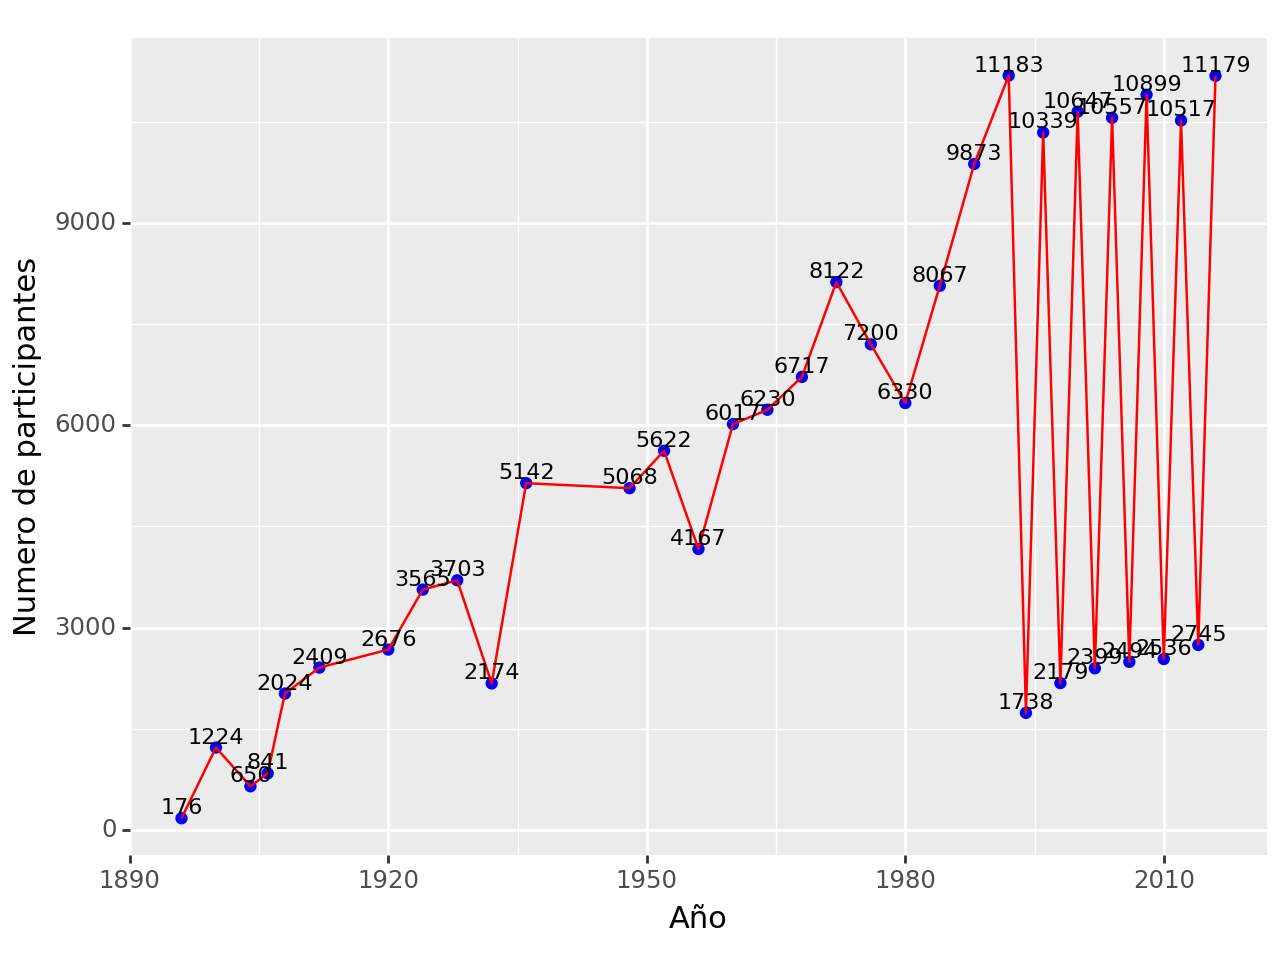

In [12]:
stacked_bar_chart = (
        pn.ggplot(athletes_by_year, pn.aes(**{"x": 'Year', "y": 'Count'}))
        + pn.geom_point(color='blue')
        + pn.geom_line(color='red')
        + pn.geom_text(pn.aes(label='Count'),  # Add text labels for 'Count'
                       nudge_y=0.05,  # Nudge the text a bit above the points
                       size=8,  # Size of the text, adjust as needed
                       va='bottom')  # Vertical alignment of text
        + pn.labs(x='Año', y='Numero de participantes')
)

stacked_bar_chart.draw()

Ejercicio 3.b

¿Por qué crees que salen esos dientes de sierra en el gráfico anterior? Arregla los datos para que muestren datos con más relevancia estadística:

- La gráfica se muestra con picos de sierra porque en 1994 se decidió separar los años en los que se celebran los juegos olímpicos de invierno y verano, para ir alternando cada 2 años


In [13]:
normalized_df = (athletes_by_year - athletes_by_year.mean()) / athletes_by_year.std()

athletes_by_year

,Year,Count
0,1896,176
1,1900,1224
2,1904,650
3,1906,841
4,1908,2024
5,1912,2409
6,1920,2676
7,1924,3565
8,1928,3703
9,1932,2174
